# Storm Identification and Mode Classification 

This notebook demostrates the storm identification and mode classification algorithm developed in [Potvin et al. (2021)](https://journals.ametsoc.org/abstract/journals/atot/aop/JTECH-D-21-0141.1/JTECH-D-21-0141.1.xml). The storm mode classification can either be a three- or seven-mode scheme. Both are demostrated here. 


In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.insert(0, path)
import monte_python

In [2]:
from os.path import join
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
import matplotlib
cmap = ListedColormap(["white", "red", "blue", "green", "purple", 'gray'])

In [3]:
from monte_python._plot.plotter import nws_dz_cmap, dz_levels_nws, label_centroid
file_path = join(path, 'tests', 'test_storm_mode.nc')
ds = xr.open_dataset(file_path)

# Identify the Storm Mode Using the 3-mode Scheme 

For `StormModeClassifier`, the inputs are `dbz_vals`, which is a 2D composite reflectivity field while `rot_vals` should be 30-min time-maximum 2-5 updraft helicitiy (valid over the 30 mins leading up the composite reflectivity field) or azimuthal shear. In this simple example, we are working with Warn-on-Forecast System (WoFS) output, so the rotation input is azimuthal shear. We are using the default parameters for `StormModeClassifier`, which are for model output. Additional documentation for `StormModeClassifier` can be found [here](https://github.com/WarnOnForecast/MontePython/blob/master/monte_python/storm_mode_classifier.py)


In this first example, we will use the 3-mode scheme, which does not attempt to identify embedded storms. For the 3-mode scheme, we set `classify_embedded=False`. 

In [4]:
dbz_vals = ds['DBZ'].values
rot_vals = ds['ROT'].values
clf = monte_python.StormModeClassifier()
storm_modes, labels, dbz_props = clf.classify(dbz_vals, rot_vals, classify_embedded=False)

* `storm_modes` is an integer labelled array where values 1-7 indicate the storm mode. 
* `labels` is an integer labelled array of the composite reflectivity objects (including the embedded regions).
* `dbz_props` is a list of skimage.RegionProperties of the the `labels` array. There is additional property, `storm_mode`, which provides the storm mode as a string. 

In [5]:
for region in dbz_props:
    print(region.storm_mode)

ORDINARY
OTHER
OTHER
SUPERCELL
QLCS


## Plot the labelled storms 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

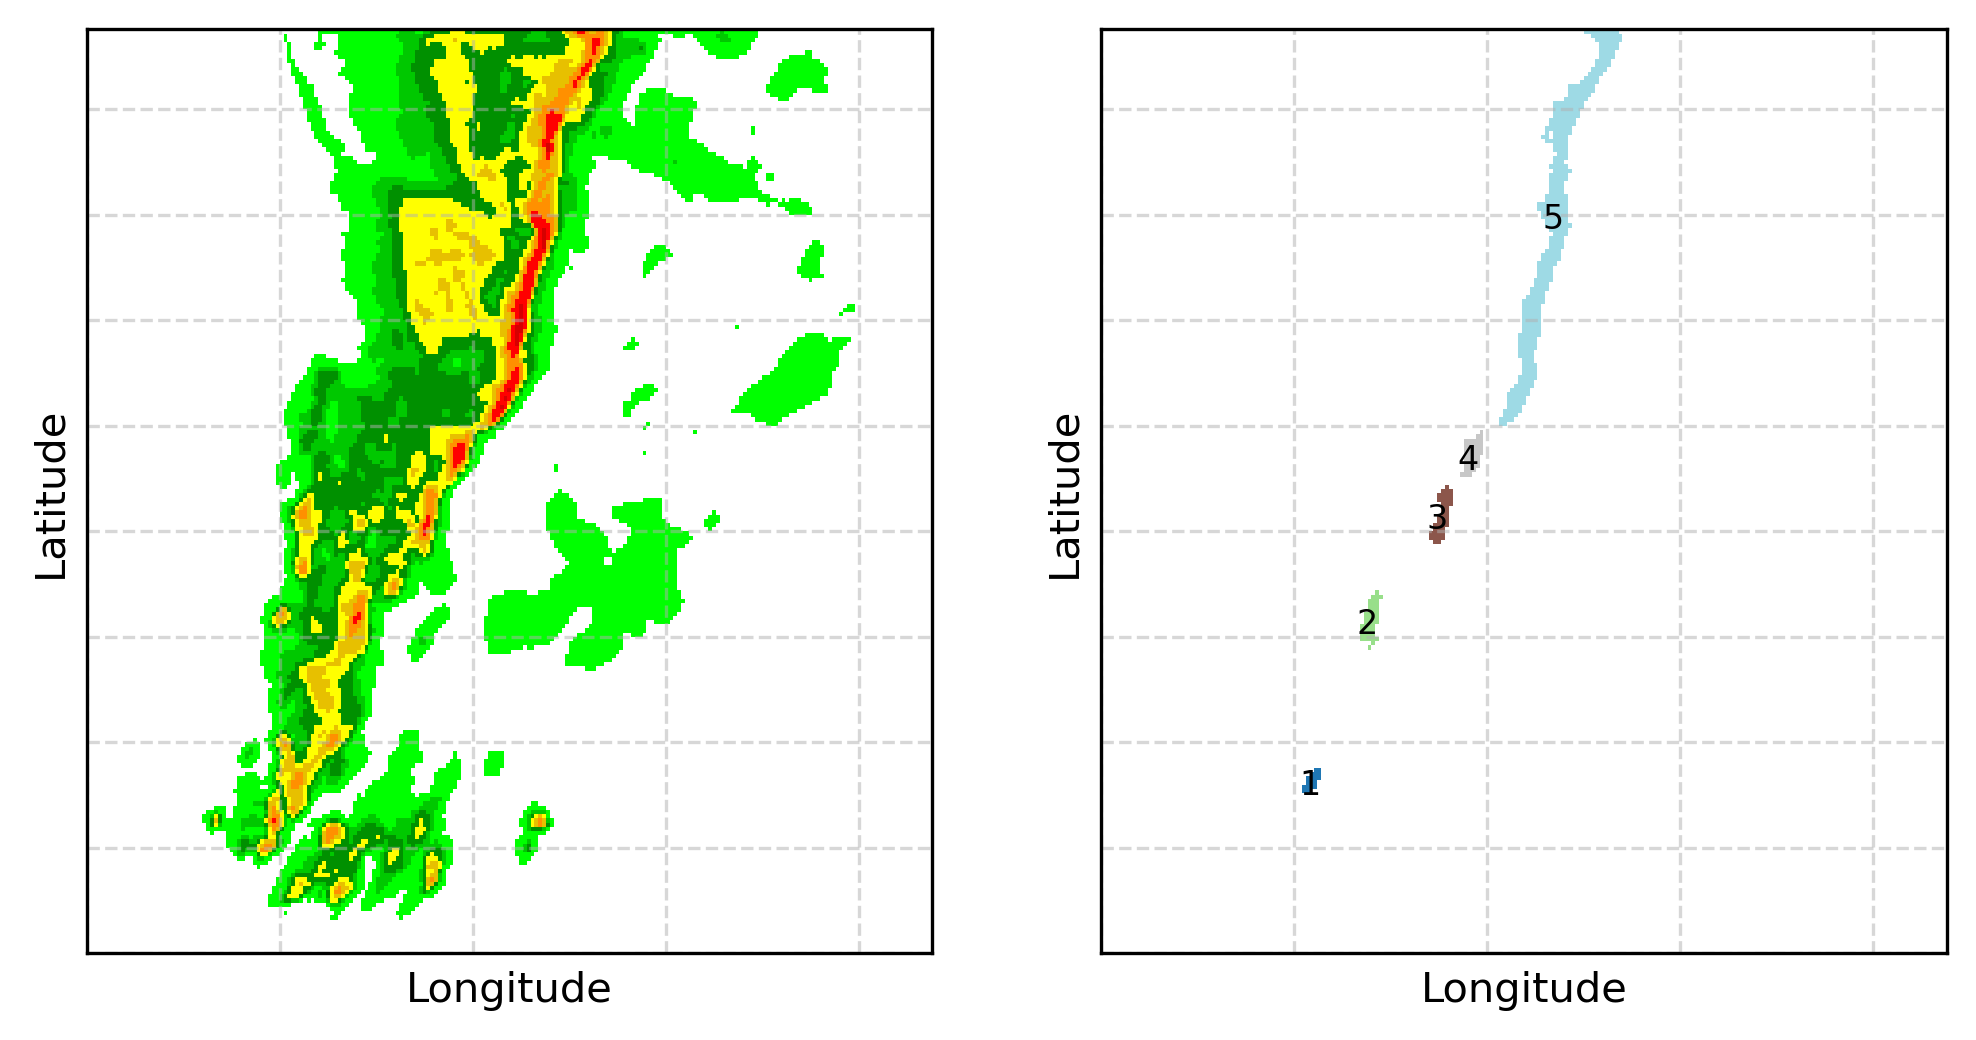

In [6]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_fake_storms(x, y, np.ma.masked_where(dbz_vals<10., dbz_vals), ax=axes[0], colorbar=False)
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[1]) 

## Plot the Storm Mode

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

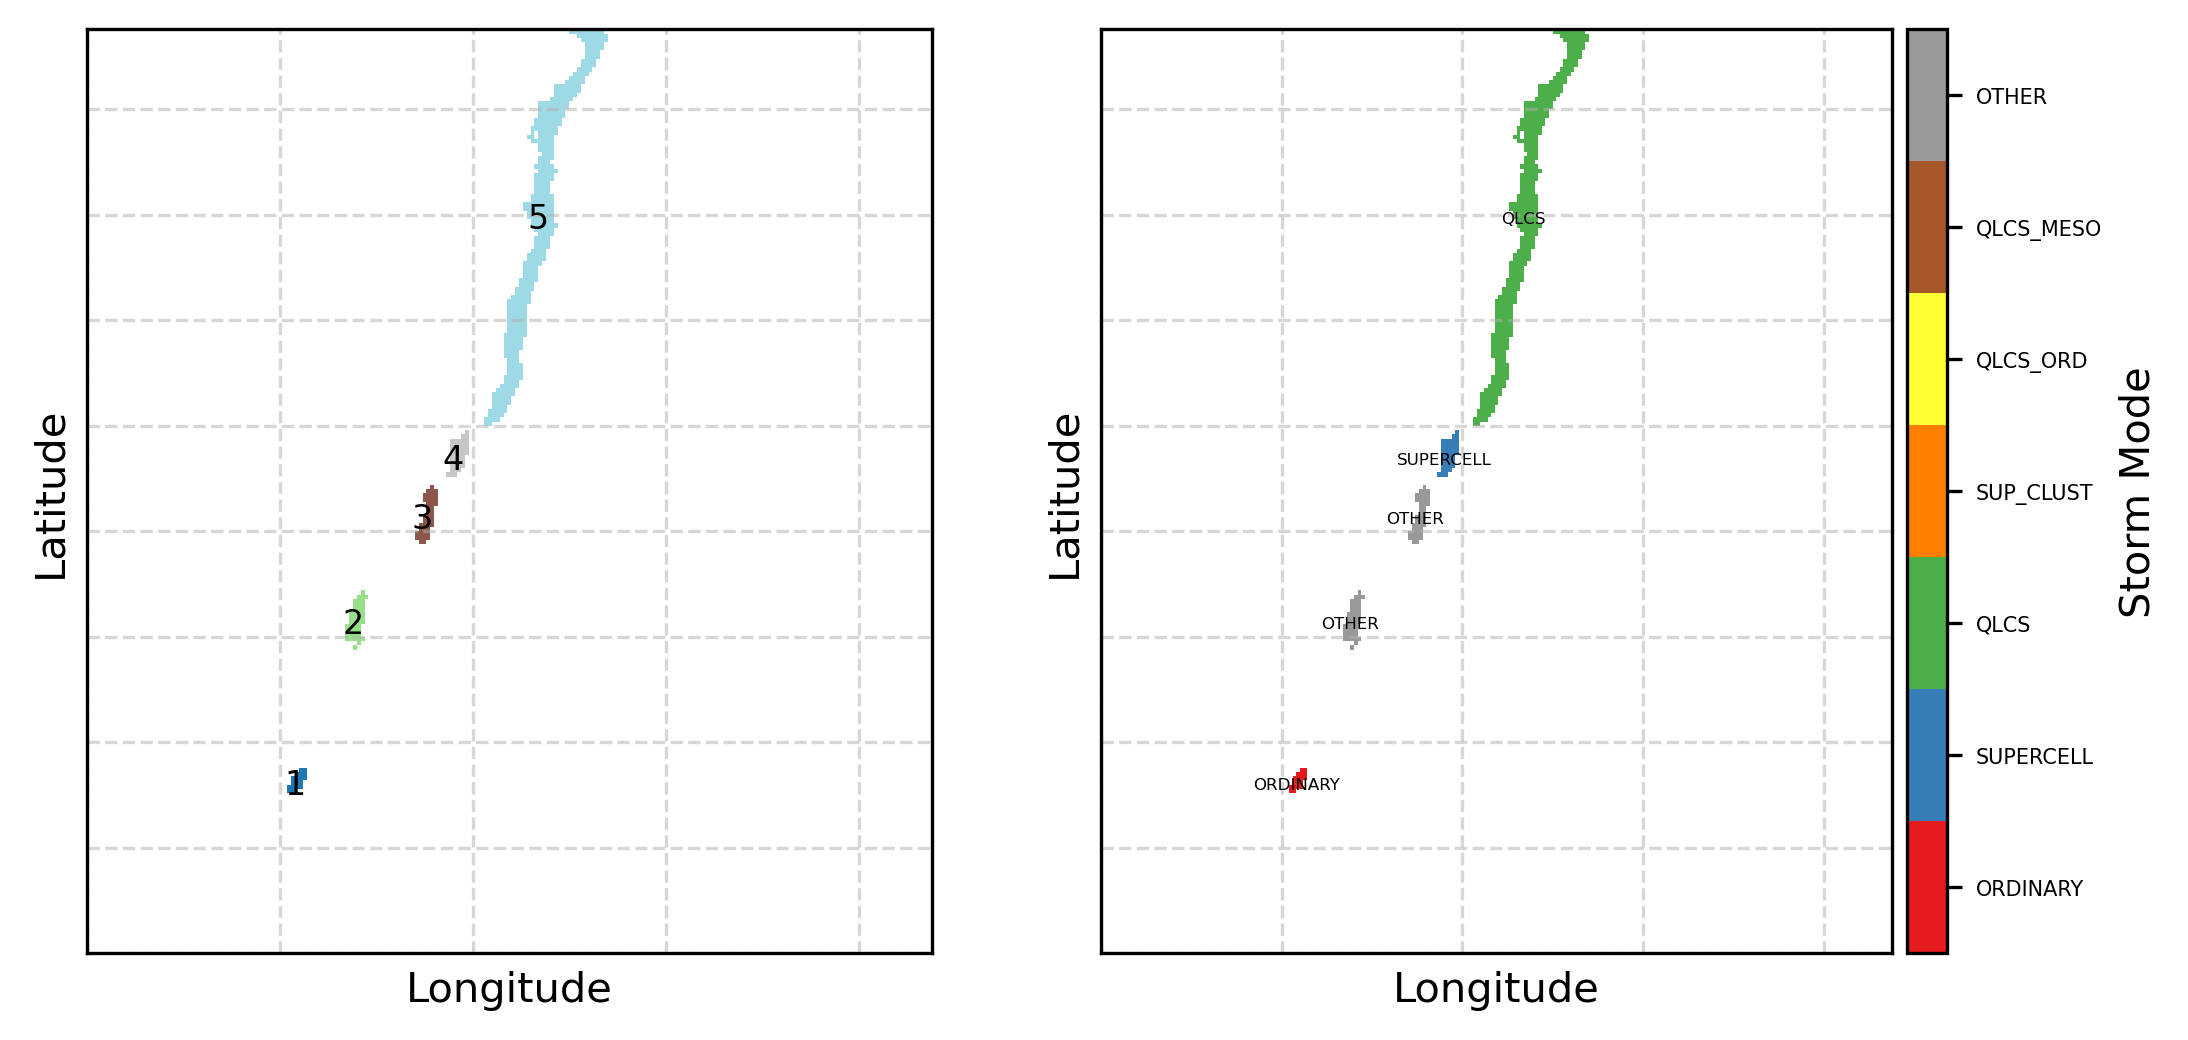

In [7]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[0]) 
monte_python.plot_storm_modes(x, y, storm_modes, dbz_props, ax=axes[1]) 

# Identify Storm Mode using the 7-Mode Scheme

In [8]:
dbz_vals = ds['DBZ'].values
rot_vals = ds['ROT'].values
clf = monte_python.StormModeClassifier()
storm_modes, labels, dbz_props = clf.classify(dbz_vals, rot_vals, classify_embedded=True)

In [9]:
for region in dbz_props:
    print(region.storm_mode)

ORDINARY
OTHER
OTHER
SUPERCELL
QLCS
QLCS_ORD
QLCS_MESO


## Plot the labelled storms

In this example, we can see that embedded cells in the QLCS are being identified and later below classified as QLCS Meso or QLCS embedded. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

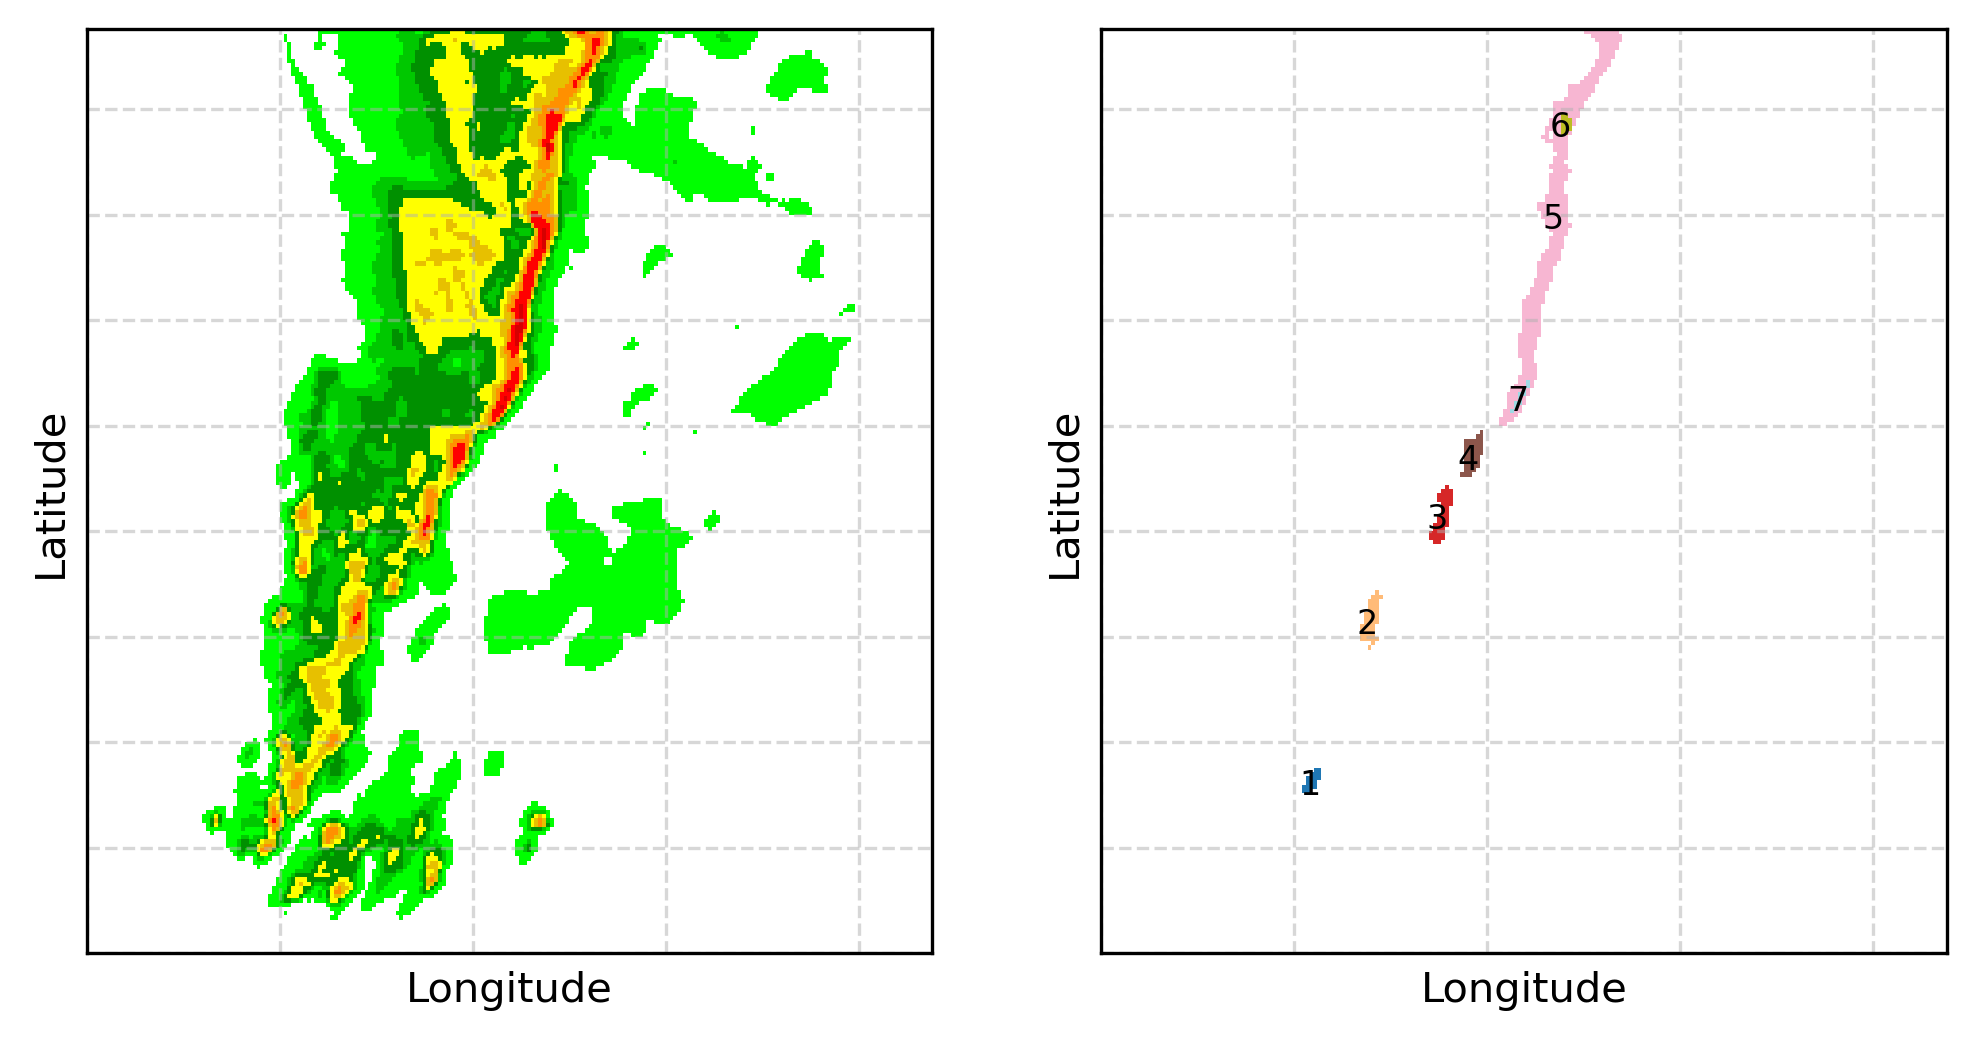

In [10]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_fake_storms(x, y, np.ma.masked_where(dbz_vals<10., dbz_vals), ax=axes[0], colorbar=False)
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[1]) 

## Plot Embedded Storm Mode

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

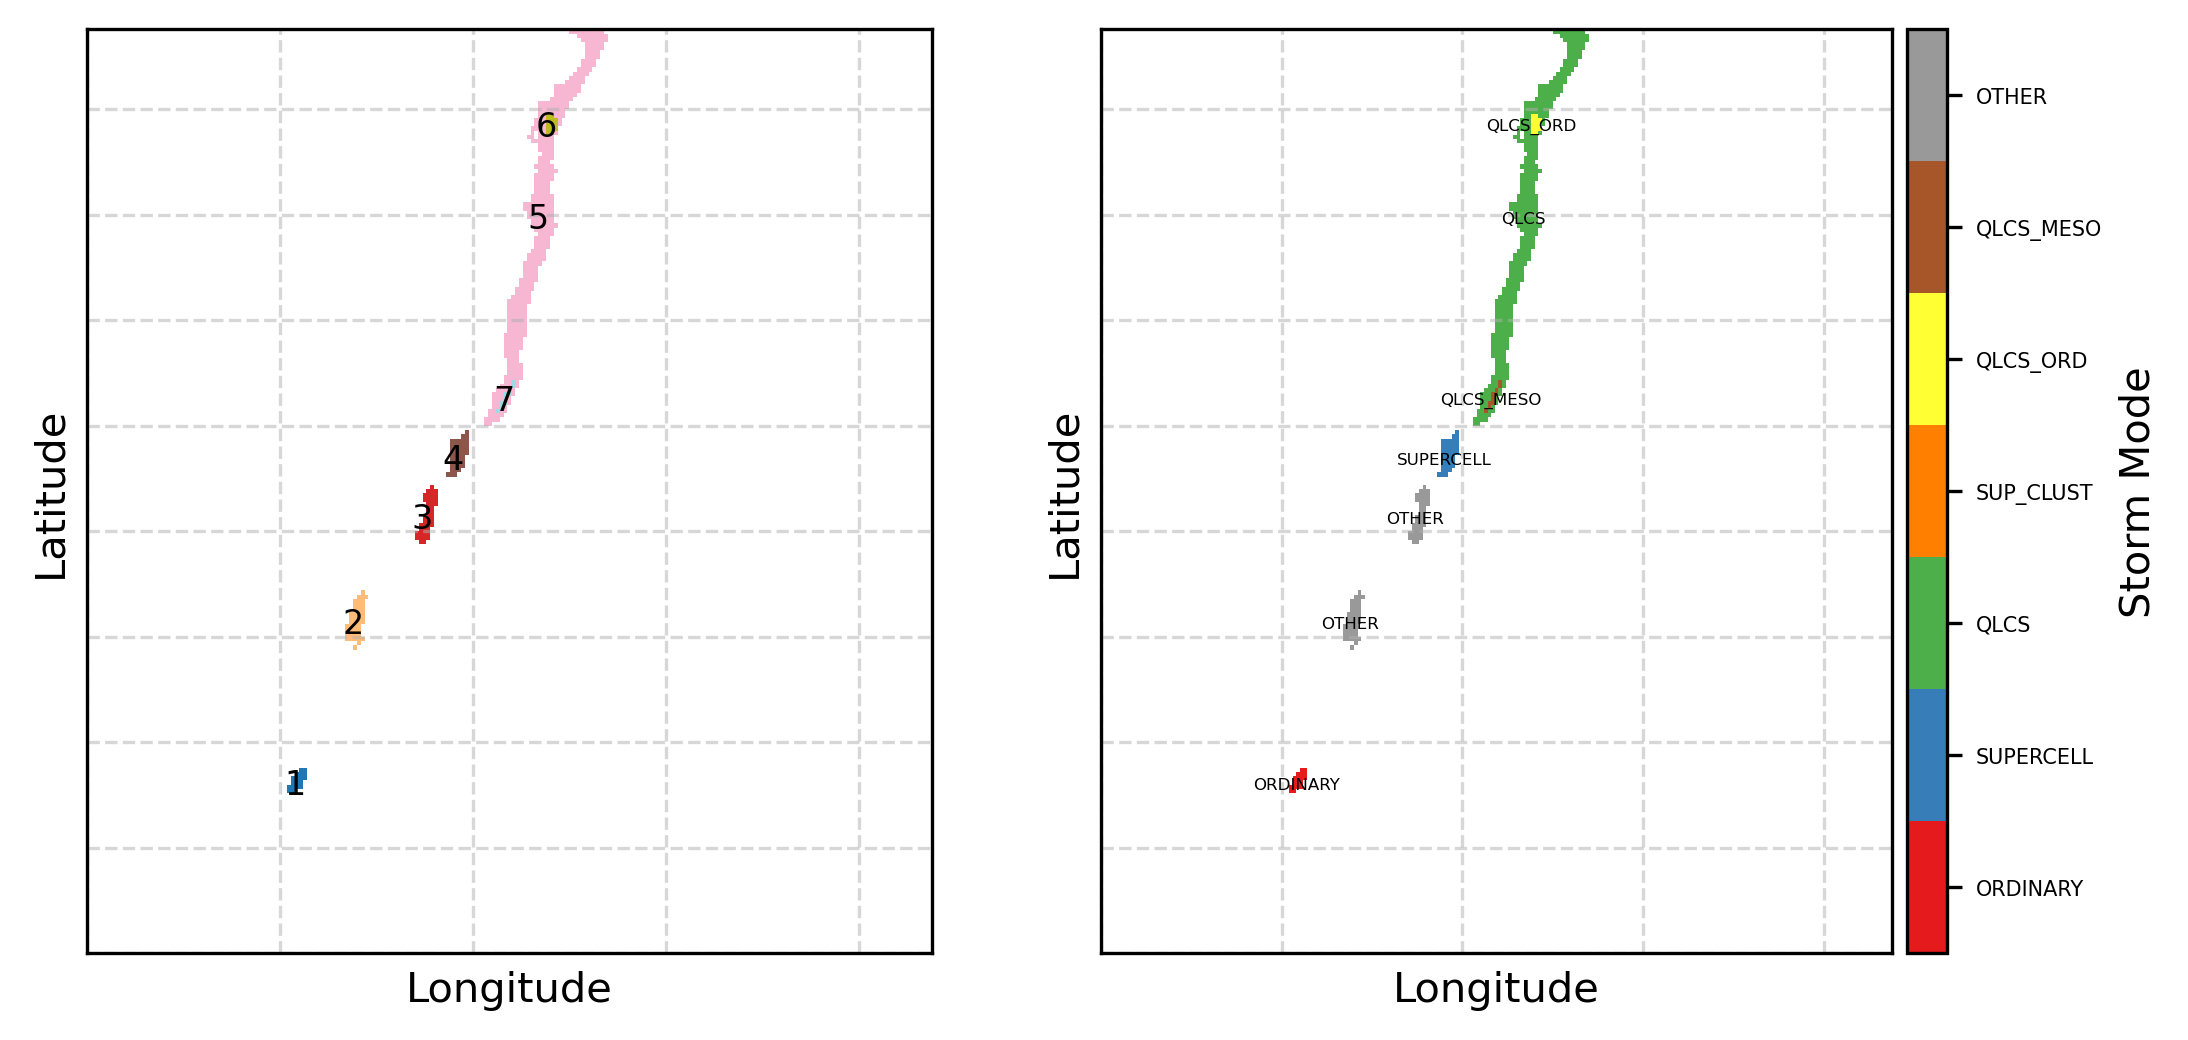

In [13]:
x,y = np.meshgrid(range(220), range(220))
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(8,4))
monte_python.plot_storm_labels(x, y, labels, dbz_props, ax=axes[0]) 
monte_python.plot_storm_modes(x, y, storm_modes, dbz_props, ax=axes[1]) 